In [83]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (8, 8)

import numpy as np

### Loading image data and splitting into train and validation set

In [17]:
digits = datasets.load_digits()
images, target, target_names = digits.images, digits.target, digits.target_names
print(f"Images shape: {images.shape}, Targets shape: {target.shape}")

Images shape: (1797, 8, 8), Targets shape: (1797,)


In [18]:
n_images = images.shape[0]
data = images.reshape(n_images, -1)

In [37]:
xtrain, xvalid, ytrain, yvalid = train_test_split(data, target, test_size=0.3, stratify=target)
xtrain /= 255
xvalid /= 255

### Fitting models

In [64]:
def fit_model(model):
    model_fit = model.fit(xtrain, ytrain)
    train_probs = model.predict_proba(xtrain)
    valid_probs = model.predict_proba(xvalid)

    train_pred = np.argmax(train_probs, axis=1)
    valid_pred = np.argmax(valid_probs, axis=1)

    train_accuracy = accuracy_score(ytrain, train_pred)
    valid_accuracy = accuracy_score(yvalid, valid_pred)

    print(f"Training accuracy = {train_accuracy:.4f}, validation accuracy = {valid_accuracy:.4f}")

In [65]:
fit_model(LogisticRegression())

Training accuracy = 0.8886, validation accuracy = 0.8963


In [67]:
fit_model(SVC(probability=True))

Training accuracy = 0.9968, validation accuracy = 0.9852


In [75]:
fit_model(SVC(gamma=100, probability=True))

Training accuracy = 1.0000, validation accuracy = 0.9907


In [88]:
cf = confusion_matrix(yvalid, valid_pred)
print(cf)

[[54  0  0  0  0  0  0  0  0  0]
 [ 0 47  2  0  0  0  2  0  1  3]
 [ 1  1 47  2  0  0  0  1  0  1]
 [ 0  1  1 47  0  1  0  5  0  0]
 [ 0  0  0  0 51  0  0  3  0  0]
 [ 0  0  0  0  0 53  0  0  0  2]
 [ 0  1  0  0  1  0 52  0  0  0]
 [ 0  0  0  0  0  2  0 52  0  0]
 [ 0 13  1  2  0  1  2  1 31  1]
 [ 0  0  0  1  1  1  0  1  0 50]]


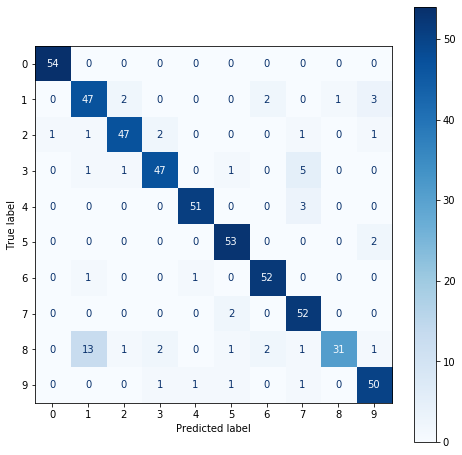

In [101]:
plot_confusion_matrix(model, xvalid, yvalid,
                     cmap=mpl.pyplot.cm.Blues)